In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import Imputer 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
LAE = np.genfromtxt('LAE_simulation_with_noise_141210_g0214_25.0.dat')
OII = np.genfromtxt('OII_simulation_with_noise_141210_g0214_25.0.dat')

In [3]:
print(LAE.shape)
print(OII.shape)

(62749, 16)
(54203, 16)


In [4]:
LAE_df = pd.DataFrame(LAE)

In [5]:
OII_df = pd.DataFrame(OII)

## Adding Binary Label Column

In [6]:
LAE_df[16] = 1

In [7]:
OII_df[16] = 0

In [8]:
data = LAE_df.append(OII_df)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,NaN,3500.0467,8.858200e-17,-0.0120,10000.0000,0.740,2.417,0.287,0.363,0.136,-1.632,1.717400e-17,0.0726,227.9933,1.081,-1.333,1
1,NaN,3500.1478,1.968700e-16,0.1393,577.5378,1.758,-1.242,1.683,-1.114,-1.168,-0.006,1.717200e-17,0.0726,296.0445,0.743,-2.570,1
2,NaN,3500.1756,9.802500e-17,0.4230,94.7012,-0.232,0.823,-0.604,0.297,0.455,0.658,1.717100e-17,0.0726,36.8827,0.306,0.360,1
3,NaN,3500.2025,9.311700e-17,4.7317,8.0422,0.240,-0.292,0.781,-0.011,0.359,0.006,1.717000e-17,0.0726,1.4682,0.021,0.889,1
4,NaN,3500.2772,8.681600e-17,1.0809,32.8245,0.241,0.632,1.898,-0.071,-0.682,-0.283,1.716800e-17,0.0726,6.8639,0.097,-1.524,1
5,NaN,3500.3451,1.330200e-16,8.2030,6.6274,0.431,1.063,0.401,0.411,0.067,0.539,1.716600e-17,0.0726,0.8467,0.012,0.190,1
6,NaN,3500.4902,1.573300e-16,0.1584,405.9694,-0.300,0.509,-1.172,0.151,-0.461,0.564,1.716200e-17,0.0726,62.1033,0.378,-0.712,1
7,NaN,3500.5536,2.048800e-16,0.3474,241.0585,-0.700,1.113,1.042,0.392,-1.391,-0.694,1.716100e-17,0.0726,99.2049,0.407,-2.445,1
8,NaN,3500.6116,9.202100e-17,0.5425,69.3353,0.511,1.096,-0.082,0.543,-0.127,0.176,1.715900e-17,0.0726,26.6718,0.261,-0.325,1
9,NaN,3500.7028,8.645300e-17,0.1872,188.7835,1.046,1.215,-0.381,0.121,1.206,0.706,1.715700e-17,0.0726,36.5440,0.397,0.724,1


In [9]:
data = data.sample(frac=1)

## Getting rid of the useless column

In [10]:
del data[0]

In [11]:
data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
4744,3702.8222,7.813500e-17,0.2351,151.9980,-0.458,1.096,0.949,0.045,0.539,0.879,1.437300e-17,0.0726,79.0592,0.576,1.092,1
42232,4757.6985,5.335400e-17,0.2648,152.1325,0.676,0.784,-0.293,-0.368,-0.598,0.529,7.790000e-18,0.0726,54.4293,0.427,-1.770,1
4755,3703.5054,1.180500e-16,0.0978,552.2457,0.931,0.237,0.459,0.193,-0.064,0.918,1.431400e-17,0.0726,165.0080,0.709,0.084,1
6934,4377.1157,1.144400e-15,472.5025,1.5479,0.869,2.332,1.748,0.266,0.543,0.268,8.217100e-18,0.0726,0.0111,0.000,1.246,0
45442,5325.1689,1.160700e-15,305.3572,3.5955,1.059,0.915,0.037,0.348,0.540,-0.029,7.682400e-18,0.0726,0.0238,0.000,1.239,0
34660,5103.3630,3.811600e-17,1.3329,24.8429,1.003,1.402,1.758,0.499,0.423,0.194,7.454000e-18,0.0726,5.0421,0.077,0.649,0
6216,3757.7559,1.289500e-16,2.5226,24.0774,1.102,1.313,-0.757,-0.156,0.947,-0.313,1.262700e-17,0.0726,2.5182,0.041,2.247,1
34274,4517.8927,4.894000e-17,0.1814,183.6867,0.294,0.219,1.244,-0.401,-1.430,1.540,8.253500e-18,0.0726,395.7089,1.201,1.058,1
10091,3876.9840,6.139000e-17,0.4468,68.8893,0.113,0.549,1.527,0.364,0.393,-1.441,1.051100e-17,0.0726,27.5898,0.294,1.053,1
2711,4159.2810,1.144300e-16,31.7349,2.0807,0.488,2.065,2.080,0.135,0.728,0.173,9.276400e-18,0.0726,0.1689,0.003,1.677,0


## Seperating Features and Labels as well as converting to numpy array

In [12]:
features = np.array(data.iloc[:,0:15])
targets = np.array(data.iloc[:,15])

In [13]:
print(features)
print(targets)

[[  3.70282220e+03   7.81350000e-17   2.35100000e-01 ...,   7.90592000e+01
    5.76000000e-01   1.09200000e+00]
 [  4.75769850e+03   5.33540000e-17   2.64800000e-01 ...,   5.44293000e+01
    4.27000000e-01  -1.77000000e+00]
 [  3.70350540e+03   1.18050000e-16   9.78000000e-02 ...,   1.65008000e+02
    7.09000000e-01   8.40000000e-02]
 ..., 
 [  5.10396740e+03   1.35820000e-16   1.96200000e+00 ...,   4.12090000e+00
    5.50000000e-02   1.45500000e+00]
 [  4.36783810e+03   5.42750000e-16   2.62966300e+02 ...,   2.04000000e-02
    0.00000000e+00   9.02000000e-01]
 [  5.34602280e+03   4.77330000e-17   1.07800000e-01 ...,   1.69159900e+02
    7.39000000e-01  -1.14200000e+00]]
[1 1 1 ..., 0 0 1]


## Running RF, Decision Tree, ERT, and SVC with default parameters

In [15]:
model = RandomForestClassifier()

scores = cross_val_score(model, features, targets, scoring='precision',cv=5)

print('Scores: ', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores:  [0.98163003 0.98034045 0.98248996 0.98165358 0.98075227]
Mean: 0.9813732572485652
Standard Deviation: 0.0007541710844073329


In [15]:
model = DecisionTreeClassifier()

scores = cross_val_score(model, features, targets, scoring='precision',cv=5)

print('Scores: ', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores:  [ 0.96500437  0.96701014  0.96800637  0.96516702  0.9671687 ]
Mean: 0.96647132167
Standard Deviation: 0.00118204534208


In [16]:
model = ExtraTreesClassifier()

scores = cross_val_score(model, features, targets, scoring='precision',cv=5)

print('Scores: ', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores:  [0.98512679 0.98546252 0.98650955 0.98521767 0.98398244]
Mean: 0.9852597935399043
Standard Deviation: 0.0008067328045994863


In [62]:
model = SVC() 

scores = cross_val_score(model, features, targets, cv = StratifiedKFold(shuffle=True, n_splits=5), scoring="precision", n_jobs = 9)

print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Standard Deviation: ",scores.std())

Scores:  [0.81756994 0.82389224 0.82537992 0.82011291 0.82729211]
Mean:  0.8228494232203767
Standard Deviation:  0.0035380728729847996


## Checking for high Variance on RF, ERT, and Decision Tree

### Random Forest had the highest Test scores so it wins

In [14]:
def checktraintest(X, y, model, ntrials =5, test_size = 0.2):

    scores_train = np.zeros(ntrials)
    scores_test = np.zeros(ntrials)

    for i in range(ntrials):
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=test_size, random_state=i)
        model.fit(X_train, y_train)
        pred_test = model.predict(X_test)
        pred_train = model.predict(X_train)

        scores_test[i] = (metrics.accuracy_score(y_test,pred_test))
        scores_train[i] =(metrics.accuracy_score(y_train,pred_train))

    print('Training scores '+str(scores_train.mean())+' +- '+str(scores_train.std()))
    print('Test scores '+str(scores_test.mean())+' +- '+str(scores_test.std()))

In [86]:
checktraintest(features, targets, DecisionTreeClassifier())

Training scores 1.0 +- 0.0
Test scores 0.9633876277200633 +- 0.0016246914524190334


In [87]:
checktraintest(features, targets, RandomForestClassifier())

Training scores 0.998386079669948 +- 8.891155221976878e-05
Test scores 0.9768714462827583 +- 0.000800720603202482


In [88]:
checktraintest(features, targets, ExtraTreesClassifier())

Training scores 1.0 +- 0.0
Test scores 0.9745286648711042 +- 0.0005097296758852095


## Confusion Matrix for more visual results

In [15]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


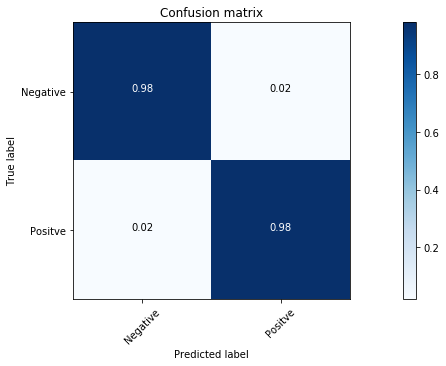

In [16]:
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(RandomForestClassifier(), features, targets, cv=StratifiedKFold(shuffle=True, n_splits=5))

cnf_matrix = confusion_matrix(targets, predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Negative", "Positve"],
                      title='Confusion matrix', normalize=True)

## Feature Importance for every model

Feature ranking:
1. feature 2 (0.248992)
2. feature 13 (0.159593)
3. feature 9 (0.108376)
4. feature 6 (0.088267)
5. feature 14 (0.070634)
6. feature 0 (0.064047)
7. feature 8 (0.062901)
8. feature 3 (0.060922)
9. feature 7 (0.041995)
10. feature 12 (0.036002)
11. feature 5 (0.032195)
12. feature 4 (0.026077)
13. feature 11 (0.000000)
14. feature 10 (0.000000)
15. feature 1 (0.000000)


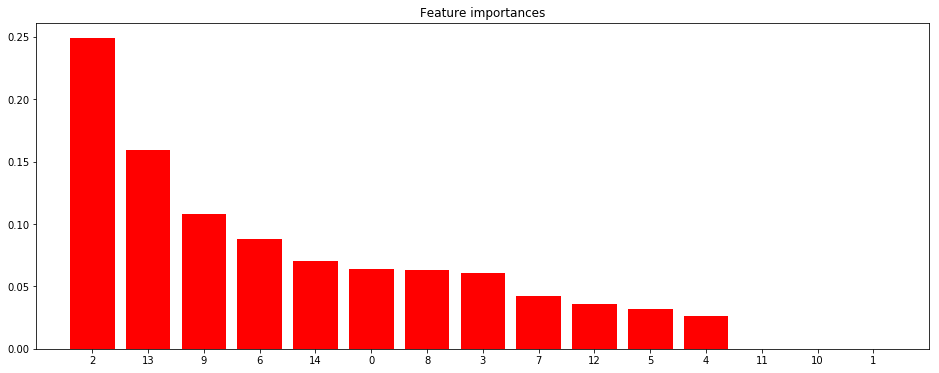

In [92]:
model = RandomForestClassifier()
model.fit(features, targets)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
plt.show()

Feature ranking:
1. feature 13 (0.170075)
2. feature 0 (0.127665)
3. feature 6 (0.106810)
4. feature 12 (0.098756)
5. feature 5 (0.088798)
6. feature 9 (0.083921)
7. feature 14 (0.073912)
8. feature 8 (0.071459)
9. feature 3 (0.069092)
10. feature 7 (0.043490)
11. feature 4 (0.042259)
12. feature 2 (0.023764)
13. feature 11 (0.000000)
14. feature 10 (0.000000)
15. feature 1 (0.000000)


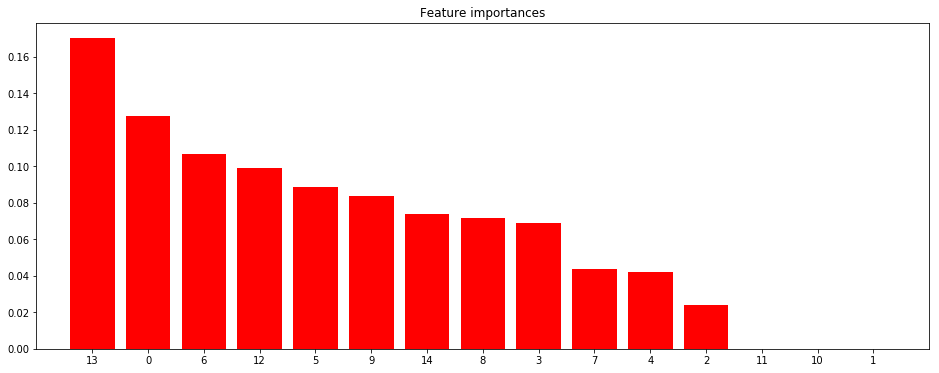

In [27]:
model = ExtraTreesClassifier()
model.fit(features, targets)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
plt.show()

Feature ranking:
1. feature 13 (0.613707)
2. feature 9 (0.128105)
3. feature 14 (0.070212)
4. feature 0 (0.068117)
5. feature 6 (0.033158)
6. feature 5 (0.022249)
7. feature 7 (0.019202)
8. feature 4 (0.013361)
9. feature 12 (0.011966)
10. feature 2 (0.007433)
11. feature 3 (0.006558)
12. feature 8 (0.005933)
13. feature 11 (0.000000)
14. feature 10 (0.000000)
15. feature 1 (0.000000)


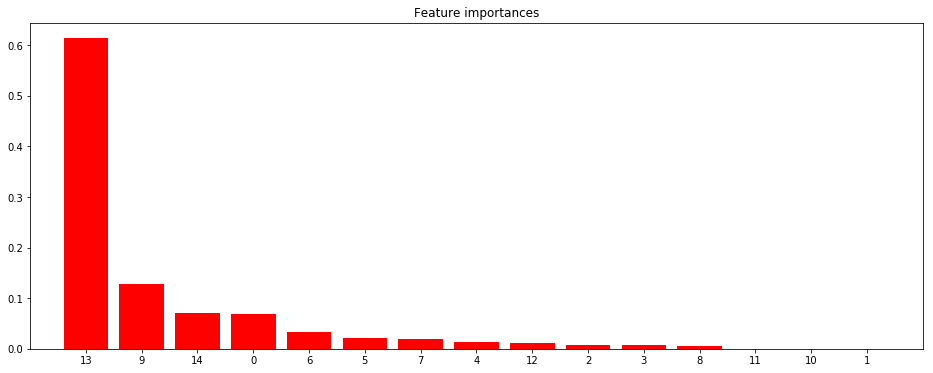

In [94]:
model = DecisionTreeClassifier()
model.fit(features, targets)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
plt.show()